# Heart Disease

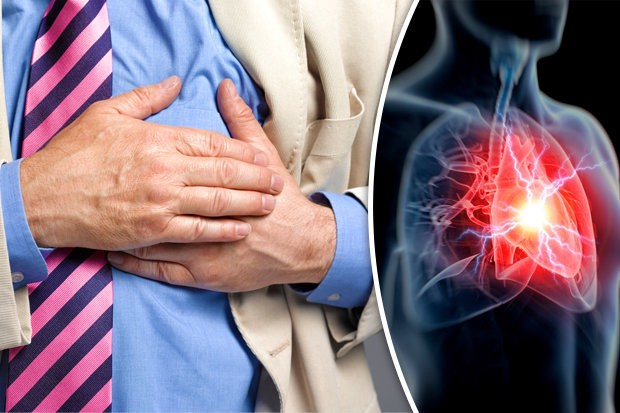

<font color = '#EFAB1F'>
Content:
    
1. [Load and check data](#1)
3. [Univariate Variable Analysis](#3)
    *          [Categorical Variable ](#4)
    *          [Numerical Variable ](#5)
1. [Visualization of Variables](#23)    
1. [Basic Data Analysis](#6)    
1. [Outlier Detection](#7)    
1. [Missing Value](#8)
    *          [Find Missing Value](#9)
1. [Pearson Correlation Coefficient](#20)   
1. [Normalization](#22)    
1. [Algorithms](#10) 
    *          [Xgboost Classifier](#11)
    *          [Decision Tree](#12)
    *          [Random Forest](#13)
    *          [KNN](#14) 
    *          [Support Vector Classifier](#15) 
    *          [Perceptron](#18)
1. [Comparison of Randomized Search CV Scores](#16)  
1. [Comparison of Grid Search CV Scores](#17)  
1. [Comparison of Cross Validation Scores](#18)  
    
    

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1"></a><br>
# Load and check data

In [ ]:
data=pd.read_csv('../input/heart-disease-uci/heart.csv')

In [ ]:
data.columns

In [ ]:
data.head(10)

1. age
1. sex
1. chest pain type (4 values)
1. resting blood pressure
1. serum cholestoral in mg/dl
1. fasting blood sugar > 120 mg/dl
1. resting electrocardiographic results (values 0,1,2)
1. maximum heart rate achieved
1. exercise induced angina
1. oldpeak = ST depression induced by exercise relative to rest
1. the slope of the peak exercise ST segment
1. number of major vessels (0-3) colored by flourosopy
1. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
data.describe()

<a id = "3"></a><br>
# Univariate Variable Analysis
* Categorical Variables: sex,cp, fbs,restecg,exang,slope,ca,thal,target
* Numerical Variables: trestbps, chol,thalach, oldpeak

<a id = "4"></b><br>
## Categorical Variable 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def bar_plot(variable):
    var =data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue,color=["#C06C84", "#5E1742", "#005D8E", "#00ADB5","#3E606F","#EFAB1F"])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [ ]:
category1 = ["sex", "cp", "fbs", "restecg", "exang", "slope","ca","thal","target"]
for c in category1:
    bar_plot(c)

<a id = "5"></a><br>
## Numerical Variable

In [ ]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

In [ ]:
numericVar = ["age","trestbps","chol","thalach","oldpeak"]
for n in numericVar:
    plot_hist(n)

<a id = "23"></a><br>
# Let's look at the distribution of variables according to the target.

In [ ]:
from matplotlib import pyplot
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(x='age',hue='target',data=data, linewidth=1,ax=ax)

## The disease is intense between the ages of 41-45 and 51-58.

In [ ]:
data['sex'].value_counts().plot(kind='pie',colors=["#EFAB1F", "#3E606F"],autopct='%1.1f%%',figsize=(9,9))
plt.show
varValue = data.sex.value_counts()
print(varValue)

## 68.3 percent of our data are men.

In [ ]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(x='sex',hue='target',data=data, linewidth=1,ax=ax)

In [ ]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('target')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='thalach', y='age', label=key
               ,color=colors[key])
plt.show()

## The disease is more common in those whose *thalach* value is less than 160.

In [ ]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('target')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='oldpeak', y='age', label=key
               ,color=colors[key])
plt.show()

In [ ]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('target')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='chol', y='age', label=key
               ,color=colors[key])
plt.show()

In [ ]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('target')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='trestbps', y='age', label=key
               ,color=colors[key])
plt.show()

<a id = "6"></a><br>
# Basic Data Analysis

* cp - target
* sex - target
* restecg - fbs
* exang - target

In [ ]:
# cp vs target
data[["cp","target"]].groupby(["cp"], as_index = False).mean().sort_values(by="target",ascending = False)

In [ ]:
# sex vs target
data[["sex","target"]].groupby(["sex"], as_index = False).mean().sort_values(by="target",ascending = False)

In [ ]:
# restecg vs target
data[["restecg","target"]].groupby(["restecg"], as_index = False).mean().sort_values(by="target",ascending = False)

In [ ]:
# exang vs target
data[["exang","target"]].groupby(["exang"], as_index = False).mean().sort_values(by="target",ascending = False)

<a id = "7"></a><br>
# Outlier Detection

In [ ]:
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
data.loc[detect_outliers(data,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])]

In [ ]:
data.head(10)

<a id = "8"></a><br>
 # Missing Value
* Find Missing Value


In [ ]:
data_len = len(data)
data = pd.concat([data],axis = 0).reset_index(drop = True)

In [ ]:
data.head()

<a id = "9"></a><br>
## Find Missing Value

In [ ]:
data.columns[data.isnull().any()]

In [ ]:
data.isnull().sum()

# Pearson Correlation Coefficient

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


data["target"] = data.target
X = data.drop("target",1)
y = data["target"]
data.head()
plt.figure(figsize=(25,25))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = abs(cor["target"]) #absolute value
#High Correlations
relevant_features = cor_target[cor_target>0.3]
relevant_features

In [ ]:
data.columns


In [ ]:
data1=data[['cp','thalach','exang','oldpeak','slope','ca','thal','target']]
data=pd.DataFrame(data1)


<a id = "22"></a><br>
    
# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:7]
Y = data.iloc[:, 7]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(Y)

 <a id = "10"></a><br>
 # Algorithms   
   *          [Xgboost Classifier](#11)
   *          [Decision Tree](#12)
   *          [Random Forest](#13)
   *          [KNN](#14) 
   *          [Support Vector Classifier](#15) 
   *          [Perceptron](#18)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
                  
X = data.iloc[:, 0:7]
Y = data.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)
accuracies ={} 
means={}
randoms={}

<a id = "11"></a><br>
# XGBoost Classifier

In [ ]:
#Manual Tuning
from xgboost import XGBClassifier
accuracy = []
for n in range(1,11):
    xgb =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.78,
                           colsample_bytree=1, max_depth=n)
    xgb.fit(X_train,y_train)
    prediction = xgb.predict(X_test)
    accuracy.append(accuracy_score(y_test, prediction))
print(accuracy)    
plt.plot(range(1,11), accuracy,color='#cd5555')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()    

## Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
    'learning_rate' : [0.08, 0.06, 0.04, 0.09],      
    'max_depth': range(1,40),
    'n_estimators': [100, 200, 300,500,1000]}
xgb =XGBClassifier()
xgb_randomcv_model=RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(xgb_randomcv_model.best_params_)
print('xgb_randomcv_model accuracy = {}'.format(xgb_randomcv_model.best_score_))
random=xgb_randomcv_model.best_score_*100
randoms['XGBoost']=random

# Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_params = { 'learning_rate' : [0.08, 0.06, 0.04, 0.09],      
    'max_depth': range(1,40),
    'n_estimators': [100, 200, 300,500,1000]}
xgb =XGBClassifier()
xgb_gridcv_model = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(xgb_gridcv_model.best_params_)
print('xgb gridcv model accuracy score = {}'.format(xgb_gridcv_model.best_score_))
acc=xgb_gridcv_model.best_score_ *100
accuracies[' XGBoost Gridsearch']=acc

## Cross Validation

In [ ]:
kfold=model_selection.KFold(n_splits=5)
modelL=XGBClassifier(n_estimators=100, max_depth=11,learning_rate=0.09)
results=model_selection.cross_val_score(modelL,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['XGBoost']=mean

<a id = "12"></a><br>
 # Decision Tree

## Randomized Search CV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_params = {'min_weight_fraction_leaf' : [0.0 , 0.2 , 0.4 , 0.6 ,0.8],
   'max_depth': range(1,40),
    'max_features': range(1,40),
    'min_samples_leaf': range(1,40),
    'max_leaf_nodes' : range(1,40)
    
    }
dt=DecisionTreeClassifier()
dt_randomcv_model=RandomizedSearchCV(estimator=dt, param_distributions=dt_params, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(dt_randomcv_model.best_params_)
print('dt_randomcv_model accuracy score = {}'.format(dt_randomcv_model.best_score_))
random=dt_randomcv_model.best_score_*100
randoms['Decision Tree']=random

## Cross Validation

In [ ]:
kfold=model_selection.KFold(n_splits=5)
modelL=DecisionTreeClassifier(min_weight_fraction_leaf=0.0,max_features=3, min_samples_leaf=15,max_depth=7,max_leaf_nodes=28)
results=model_selection.cross_val_score(modelL,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['Decision Tree']=mean

<a id = "13"></a><br>
 # Random Forest

## Randomized Search CV

In [ ]:
rf_params = {
   'max_depth': range(1,40),
    'max_features': range(1,40),
    'min_samples_leaf': range(1,20),
    'min_samples_split': range(1,20),
    'n_estimators': [100, 200, 300,500,1000]}
rf=RandomForestClassifier()
rf_randomcv_model=RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(rf_randomcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(rf_randomcv_model.best_score_))
random=rf_randomcv_model.best_score_*100
randoms['Random Forest']=random


## Cross Validation

In [ ]:
kfold=model_selection.KFold(n_splits=5)
modelL=RandomForestClassifier(n_estimators=100,min_samples_split=14, min_samples_leaf=4,max_depth=7)
results=model_selection.cross_val_score(modelL,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['Random Forest']=mean

<a id = "14"></a><br>
 # KNN

## Randomized Search CV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {'n_neighbors' : range(1,10)
   }
knn=KNeighborsClassifier()
knn_randomcv_model=RandomizedSearchCV(estimator=knn, param_distributions=knn_params, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(knn_randomcv_model.best_params_)
print('knn_randomcv_model accuracy score = {}'.format(knn_randomcv_model.best_score_))
random=knn_randomcv_model.best_score_*100
randoms['KNN']=random


## Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_params = {'n_neighbors' : range(1,10),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto','ball_tree','kd_tree','brute'],
              'p' : [1,2]
   }
knn=KNeighborsClassifier()
knn_gridcv_model=GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(knn_gridcv_model.best_params_)
print('knn_randomcv_model accuracy score = {}'.format(knn_gridcv_model.best_score_)) 
acc=knn_gridcv_model.best_score_ *100
accuracies['KNN Gridsearch']=acc

In [ ]:
kfold=model_selection.KFold(n_splits=5)
modelL=KNeighborsClassifier(n_neighbors= 1)
results=model_selection.cross_val_score(modelL,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['KNN']=mean

<a id = "15"></a><br>
# Support Vector Classifier

## Grid Search CV

In [ ]:
from sklearn.svm import SVC
svc_params= {'C' : [0.1,0.2,0.3,0.001,0.003],
             'kernel': ['linear','poly','rbf','sigmoid']}
svc=SVC()
svc_gridcv_model=GridSearchCV(estimator=svc, param_grid=svc_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(svc_gridcv_model.best_params_)
print('rf_gridcv_model accuracy score = {}'.format(svc_gridcv_model.best_score_))
acc=svc_gridcv_model.best_score_ *100
accuracies['SVC Gridsearch']=acc

## Cross Validation

In [ ]:
kfold=model_selection.KFold(n_splits=5)
model=SVC(C=0.1,kernel='linear')
results=model_selection.cross_val_score(model,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['SVC']=mean

<a id = "18"></a><br>
# Neural Network(Perceptron)


## Grid Search CV

In [ ]:
from sklearn.linear_model import Perceptron
pr_params= {'penalty' : ['l2','l1','elasticnet','None'],
             'alpha': [0.0001,0.001,0.0002,0.0004,0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
           'max_iter': [50,100,250,1000]}
pr=Perceptron()
pr_gridcv_model=GridSearchCV(estimator=pr, param_grid=pr_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(pr_gridcv_model.best_params_)
print('pr_gridcv_model accuracy score = {}'.format(pr_gridcv_model.best_score_)) 
acc=pr_gridcv_model.best_score_ *100
accuracies['Perceptron Gridsearch']=acc

## Cross Validation

In [ ]:
kfold=model_selection.KFold(n_splits=5)
model=Perceptron(alpha=0.0003,max_iter=50,penalty='l1')
results=model_selection.cross_val_score(model,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['Perceptron']=mean

<a id = "16"></a><br>
# Comparison of Randomized Search CV Scores

In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(randoms.keys()), y=list(randoms.values()), palette=colors)
plt.show()

#  Comparison Grid Search CV Scores

In [ ]:
colors = ["#C06C84", "#5E1742", "#005D8E"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("GridSearch Scores%")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Comparison Cross Validation Scores

In [ ]:
colors = ["#C06C84", "#5E1742", "#005D8E", "#00ADB5","#3E606F","#EFAB1F"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Cross Validation Scores %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(means.keys()), y=list(means.values()), palette=colors)
plt.show()

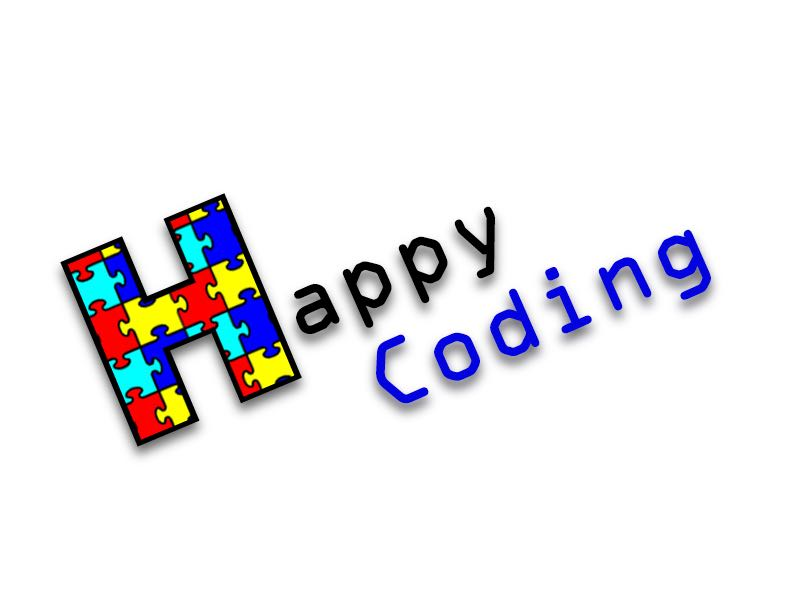